In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline 

# Визуальный анализ рейтингов шоу Netflix
<img src="https://pp.userapi.com/c854528/v854528797/c62ce/FiPEibYUxJc.jpg" width="40%">

Netflix за последние 5-10 лет обзавелись большим количеством зрителей. С увеличением числа зрителей увеличилось и разнообразие шоу. Соответственно, перед аналитиками из киноиндустрии встала задача исследования данных с рейтингами различных сериалов.  
В данном задании вам предстоит провести визуальный анализ датасета **1000 Netflix Shows** (по состоянию на 11.06.2017) и сделать выводы.  



### Описание признаков:
* `title` - название шоу.
* `rating` - рейтинг шоу. Например: G, PG, TV-14, TV-MA.
* `ratingLevel` - описание рейтинговой группы и особенностей шоу.
* `ratingDescription` - рейтинг шоу, закодированный в числом.
* `release year` - год выпуска шоу.
* `user rating score` - оценка пользователей.
* `user_rating_size` - общий рейтинг пользователей.

## Требования к групповому проекту

В качестве результата ваша группа должна получить презентацию и защитить ее на дополнительном занятии.  
Ссылка на шаблон к презентации: лежит рядом с заданием в классруме.  
Вы можете менять оформление презентации, но помните, что результат должен быть релевантен для демонстрации заказчику. Например, вставлять в презентацию строчки кода или злоупотреблять скринами блокнота не стоит :)

Помимо презентации, каждому из участников проекта нужно будет сдать свой notebook c решением на проверку. Наши ассистенты проверять ваш код, визуализацию и выводы. 

### Вопросы, на которые нужно ответить в презентации: 
- Сколько рейтинговых групп представлено в данных?
- Какие оценки пользователи ставят чаще всего?
- Какие оценки пользователи ставят в среднем?
- В какие годы были запущены шоу?
- Можно ли сделать вывод, что 2017 год успешнее для Netflix?
- В каких рейтинговых группах запущены шоу на Netflix?
- Выберите любое шоу (например, самое понравившееся) и составьте его описательный портрет. На какие вопросы о нем вам было бы интересно ответить, если бы вы были заказчиком? Ответьте на эти вопросы :) 

Вопросы ниже помогут вам ответить на вопросы из презентации и сопроводить выводы релевантной визуализацией. 

Любой хороший Data Scientist должен уметь работать в команде, поэтому распределение ваших усилий в проекте остается за вами. Как пример, вы можете распределить вопросы/слайды между собой.

### Полезные замечания и советы
- Следите за тем, чтобы все графики на слайдах можно было прочитать даже без ваших комментариев;
- Не нужно делать просто текстовые слайды;
- Не обязательно ограничиваться представленным датасетом. У вас есть весь интернет, чтобы найти дополнительную информацию и проверить ваши гипотезы. Дерзайте!


## Решение

Скачайте данные: они лежат рядом с этим файлом в классруме. 
Загрузите данные, выполнив код ниже.

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving NetflixShows.csv to NetflixShows.csv


In [ ]:
data = pd.read_csv("NetflixShows.csv", encoding='cp437')
data

title rating  \
0               White Chicks  PG-13   
1        Lucky Number Slevin      R   
2             Grey's Anatomy  TV-14   
3               Prison Break  TV-14   
4      How I Met Your Mother  TV-PG   
..                       ...    ...   
995                  The BFG     PG   
996  The Secret Life of Pets     PG   
997         Precious Puppies   TV-G   
998              Beary Tales   TV-G   
999          Growing Up Wild      G   

                                           ratingLevel  ratingDescription  \
0    crude and sexual humor, language and some drug...                 80   
1    strong violence, sexual content and adult lang...                100   
2    Parents strongly cautioned. May be unsuitable ...                 90   
3    Parents strongly cautioned. May be unsuitable ...                 90   
4    Parental guidance suggested. May not be suitab...                 70   
..                                                 ...                ...   
995  for action/peril, some scary moments and brief...                 60   
996                     for action and some rude humor                 60   
997                             Suitable for all ages.                 35   
998                             Suitable for all ages.                 35   
999                                                NaN                 35   

     release year  user rating score  user rating size  
0            2004               82.0                80  
1            2006                NaN                82  
2            2016               98.0                80  
3            2008               98.0                80  
4            2014               94.0                80  
..            ...                ...               ...  
995          2016               97.0                80  
996          2016                NaN                81  
997          2003                NaN                82  
998          2013                NaN                82  
999          2016               80.0                80  

[1000 rows x 7 columns]

In [ ]:
del data['ratingDescription'], data['user rating size']

In [ ]:
data

title rating  \
0               White Chicks  PG-13   
1        Lucky Number Slevin      R   
2             Grey's Anatomy  TV-14   
3               Prison Break  TV-14   
4      How I Met Your Mother  TV-PG   
..                       ...    ...   
995                  The BFG     PG   
996  The Secret Life of Pets     PG   
997         Precious Puppies   TV-G   
998              Beary Tales   TV-G   
999          Growing Up Wild      G   

                                           ratingLevel  release year  \
0    crude and sexual humor, language and some drug...          2004   
1    strong violence, sexual content and adult lang...          2006   
2    Parents strongly cautioned. May be unsuitable ...          2016   
3    Parents strongly cautioned. May be unsuitable ...          2008   
4    Parental guidance suggested. May not be suitab...          2014   
..                                                 ...           ...   
995  for action/peril, some scary moments and brief...          2016   
996                     for action and some rude humor          2016   
997                             Suitable for all ages.          2003   
998                             Suitable for all ages.          2013   
999                                                NaN          2016   

     user rating score  
0                 82.0  
1                  NaN  
2                 98.0  
3                 98.0  
4                 94.0  
..                 ...  
995               97.0  
996                NaN  
997                NaN  
998                NaN  
999               80.0  

[1000 rows x 5 columns]

### Удалите из данных дубликаты. 
- Почему они возникли?
- Много ли их? В каких группах их больше всего?

In [ ]:
data_clean = data.drop_duplicates(inplace=True)
data.to_csv("NetflixShows.csv", index=False)
print(data_clean)

None


### Сколько рейтинговых групп представлено в данных?

In [ ]:
num_unique = len(data['ratingLevel'].unique())
print(f'Количество рейтинговых групп в столбце "ratingLevel": {num_unique}')

Количество рейтинговых групп в столбце "ratingLevel": 9


In [ ]:
# получение уникальных значений столбца ratingLevel и их порядковых номеров
unique_rating_levels = data['ratingLevel'].unique()
unique_rating_levels_data = pd.DataFrame({'№': range(1, len(unique_rating_levels) + 1), 'ratingLevel': unique_rating_levels})

# вывод DataFrame с уникальными значениями столбца ratingLevel и их номерами
print(unique_rating_levels_data)

   №                                        ratingLevel
0  1                                             Others
1  2  Parents strongly cautioned. May be unsuitable ...
2  3  Parental guidance suggested. May not be suitab...
3  4  For mature audiences.  May not be suitable for...
4  5                             Suitable for all ages.
5  6                                                NaN
6  7  Suitable for children ages 7 and older.  Conte...
7  8          General Audiences. Suitable for all ages.
8  9             Suitable for children ages 7 and older


### Какие оценки пользователи ставят чаще? 

- Постройте гистограмму оценок.
- Почему именно такие оценки ставят чаще всего?

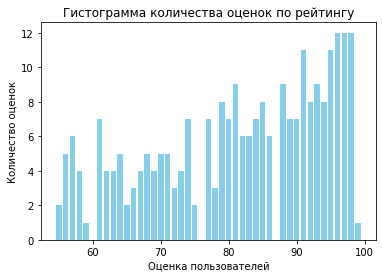

In [ ]:
value_counts = data['user rating score'].value_counts()
plt.bar(value_counts.index, value_counts.values, color='skyblue')
plt.xlabel('Оценка пользователей')
plt.ylabel('Количество оценок')
plt.title('Гистограмма количества оценок по рейтингу')
plt.show()

In [ ]:
value_counts

97.0    12
96.0    12
98.0    12
95.0    11
91.0    11
93.0     9
88.0     9
81.0     9
94.0     8
92.0     8
79.0     8
85.0     8
61.0     7
89.0     7
74.0     7
84.0     7
80.0     7
77.0     7
90.0     7
86.0     6
82.0     6
83.0     6
57.0     6
70.0     5
64.0     5
68.0     5
71.0     5
56.0     5
69.0     4
67.0     4
58.0     4
62.0     4
73.0     4
63.0     4
66.0     3
78.0     3
72.0     3
55.0     2
75.0     2
65.0     2
99.0     1
59.0     1
Name: user rating score, dtype: int64

*   Почему именно такие оценки ставят чаще всего?


Netflix, Inc. — американская развлекательная компания, а также стриминговый сервис фильмов и сериалов.


-Отрасль компании:	индустрия развлечений, киноиндустрия.


-Продукция компании:	кинопроизводство, телепроизводство, потоковое видео, онлайн-прокат Blu-ray и DVD.

Можно предположить, что преимущественно высокие оценки говорят о высоком качестве контента, эффективной маркетинговой кампании. Netflix заинтересована в увеличении количества пользователей, засчет чего растет прибыль компании.

### Выведите основную информацию об оценках пользователей
- Чему равны среднее, стандартное отклонение, минимум, максимум, медиана? 
- Отличаются ли медиана и среднее? 
- Могут ли данные характеристики значительно отличаться? Почему?

*   Чему равны среднее, стандартное отклонение, минимум, максимум, медиана?

In [ ]:
mean_rating = data['user rating score'].mean()
std_rating = data['user rating score'].std()
min_rating = data['user rating score'].min()
max_rating = data['user rating score'].max()
median_rating = data['user rating score'].median()
moda_rating = data['user rating score'].mode()
print(f'Среднее значение в столбце "user rating score": {mean_rating}')
print(f'Стандартное отклонение в столбце "user rating score": {std_rating}')
print(f'Минимальное значение в столбце "user rating score": {min_rating}')
print(f'Максимальное значение в столбце "user rating score": {max_rating}')
print(f'Значение медианы в столбце "user rating score": {median_rating}')
print(f'Мода в столбце "user rating score": {moda_rating}')

Среднее значение в столбце "user rating score": 81.3984375
Стандартное отклонение в столбце "user rating score": 12.730904096632221
Минимальное значение в столбце "user rating score": 55.0
Максимальное значение в столбце "user rating score": 99.0
Значение медианы в столбце "user rating score": 83.5
Мода в столбце "user rating score": 0    96.0
1    97.0
2    98.0
Name: user rating score, dtype: float64


*   Отличаются ли медиана и среднее?

In [ ]:
difference = (median_rating/mean_rating-1)*100
rounded_difference = round(difference, 2)
print(f'Различие медианы и среднего значения в столбце "user rating score": {rounded_difference}%')

Различие медианы и среднего значения в столбце "user rating score": 2.58%


*   Могут ли данные характеристики значительно отличаться? Почему?

Да, медиана и среднее значение могут значительно отличаться в данных, особенно если распределение данных имеет асимметричную форму.

Среднее значение (или среднее арифметическое) является мерой центральной тенденции, которая определяется как сумма всех значений, поделенная на их количество. Она чувствительна к выбросам и может значительно изменяться при наличии значений, которые сильно отклоняются от остальных.

Медиана является мерой центральной тенденции, которая находится в середине отсортированного списка значений. Она не зависит от выбросов и является более устойчивой мерой центральной тенденции, чем среднее значение.

Вывод: если в данных присутствуют выбросы или асимметричное распределение, то медиана и среднее значение могут значительно отличаться. Например, в распределении с большим количеством выбросов, среднее значение будет смещено в сторону выбросов, в то время как медиана останется более близкой к центру распределения. Поэтому при анализе данных всегда следует учитывать как среднее значение, так и медиану, а также другие характеристики распределения данных, чтобы получить полное представление о данных.

### В какие годы были запущены шоу, представленные в датасете?

In [ ]:
title_year = data.loc[:, ['title', 'release year']]
title_year

title  release year
0                 White Chicks          2004
1          Lucky Number Slevin          2006
2               Grey's Anatomy          2016
3                 Prison Break          2008
4        How I Met Your Mother          2014
..                         ...           ...
989            Russell Madness          2015
993  Wiener Dog Internationals          2015
994                   Pup Star          2016
997           Precious Puppies          2003
998                Beary Tales          2013

[500 rows x 2 columns]

### Постройте график, показывающий распределение количества запущенных шоу в зависимости от года. 

- Наблюдается ли рост?

Да, рост наблюдается.
- Есть ли выбросы? 

Выбросы присутствуют. Показатели 2016 сильно отличаются от остальных в выборке.
- Что из себя представляют выбросы?

Выброс (англ. outlier) в данных - это наблюдение, которое сильно отличается от остальных данных в выборке. Выбросы могут возникать по разным причинам, например, ошибки измерений, случайные события или необычные условия, и они могут исказить общую картину данных.

Выбросы могут быть как положительными, так и отрицательными. Положительный выброс - это наблюдение, которое значительно больше среднего значения выборки, а отрицательный выброс - это наблюдение, которое значительно меньше среднего значения выборки.

- Чем могут быть они вызваны?


-Ошибки измерения: Выбросы могут быть вызваны ошибками при сборе данных, такими как опечатки, ошибки при передаче данных.

-Естественные выбросы: В некоторых случаях выбросы могут быть естественными и объясняться особенностями изучаемого явления или процесса.

-Аномальные условия: Выбросы могут быть вызваны аномальными условиями, такими как необычное событие или ошибки в работе оборудования.

-Ошибки при обработке данных: Выбросы могут быть вызваны ошибками при обработке данных, такими как неправильный выбор статистического метода или некорректная интерпретация результатов.

-Манипуляции с данными: В некоторых случаях выбросы могут быть вызваны манипуляциями с данными, такими как фальсификация данных или намеренное искажение результатов.

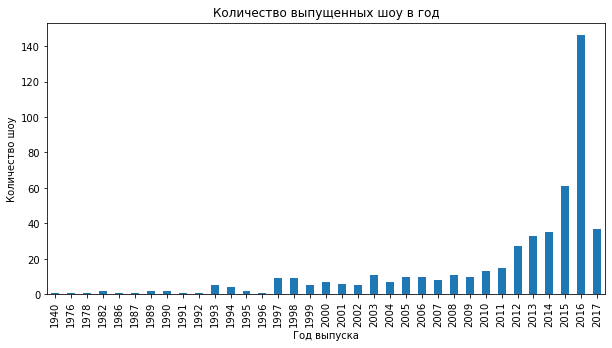

release year
1940      1
1976      1
1978      1
1982      2
1986      1
1987      1
1989      2
1990      2
1991      1
1992      1
1993      5
1994      4
1995      2
1996      1
1997      9
1998      9
1999      5
2000      7
2001      6
2002      5
2003     11
2004      7
2005     10
2006     10
2007      8
2008     11
2009     10
2010     13
2011     15
2012     27
2013     33
2014     35
2015     61
2016    146
2017     37
Name: release year, dtype: int64


In [ ]:
# Группировка данных по году выпуска и подсчет количества значений
count_by_year = data.groupby('release year')['release year'].count()
data['release year'].value_counts().sort_index().plot(kind='bar', figsize=(10,5))
plt.title('Количество выпущенных шоу в год')
plt.xlabel('Год выпуска')
plt.ylabel('Количество шоу')
plt.show()
print(count_by_year)

### Сравните среднюю оценку пользователей в 2016 со средней оценкой в 2017. 
- Можно ли сделать вывод, что 2017 год успешнее для Netflix? ("Успешнее" значит, что пользователи в среднем ставили более высокие оценки) 

Судя по данным средняя оценка пользователей в 2017 выше, чем в 2016.
- Как еще можно оценить "Успешность"? 

По количеству пользователей. Но такие данные отсутсвуют.



In [ ]:
data_2016 = data[data['release year'] == 2016]
data_2017 = data[data['release year'] == 2017]

# Вычисление средней оценки пользователей
mean_score_2016 = data_2016['user rating score'].mean()
mean_score_2017 = data_2017['user rating score'].mean()
print(mean_score_2016, mean_score_2017)

# Сравнение средних оценок
if mean_score_2016 > mean_score_2017:
    print("Средняя оценка пользователей в 2016 выше, чем в 2017")
elif mean_score_2016 < mean_score_2017:
    print("Средняя оценка пользователей в 2017 выше, чем в 2016")
else:
    print("Средняя оценка пользователей в 2016 и 2017 равны")

84.31395348837209 88.125
Средняя оценка пользователей в 2017 выше, чем в 2016


График средней оценки пользователей по годам

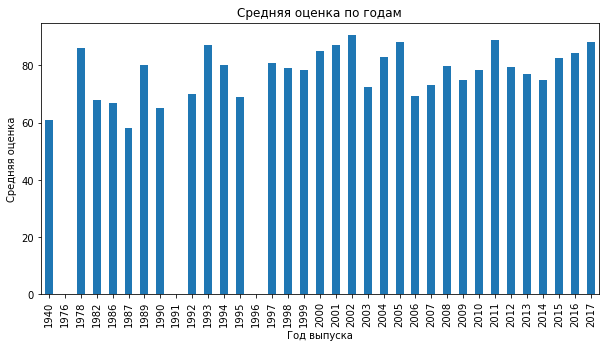

release year
1940    61.000000
1976          NaN
1978    86.000000
1982    68.000000
1986    67.000000
1987    58.000000
1989    80.000000
1990    65.000000
1991          NaN
1992    70.000000
1993    87.000000
1994    80.000000
1995    69.000000
1996          NaN
1997    80.800000
1998    79.000000
1999    78.250000
2000    85.000000
2001    87.000000
2002    90.500000
2003    72.600000
2004    83.000000
2005    88.142857
2006    69.285714
2007    73.200000
2008    79.833333
2009    75.000000
2010    78.333333
2011    89.000000
2012    79.437500
2013    76.909091
2014    74.916667
2015    82.750000
2016    84.313953
2017    88.125000
Name: user rating score, dtype: float64


In [ ]:
# Группировка данных по году выпуска и вычисление среднего
mean_by_year = data.groupby('release year')['user rating score'].mean()
mean_by_year.plot(kind='bar', figsize=(10,5))
plt.title('Средняя оценка по годам')
plt.xlabel('Год выпуска')
plt.ylabel('Средняя оценка')
plt.show()
print(mean_by_year)

### Как нагляднее будет показать распределение пользователям по рейтинговым группам?

Ниже представлены два графика, показывающие распределение шоу по рейтинговым группам. Какой тип графика визуально более интерпретируемый? ([Подсказка](https://sun9-40.userapi.com/c854228/v854228652/c754f/j6z5gMjJy2k.jpg))  
Постройте самостоятельно график, который считаете более интерпретируемым. Сделайте вывод.

# Новый раздел

![Charts](https://pp.userapi.com/c852024/v852024281/1a53b1/jSOsBIhxK3U.jpg)

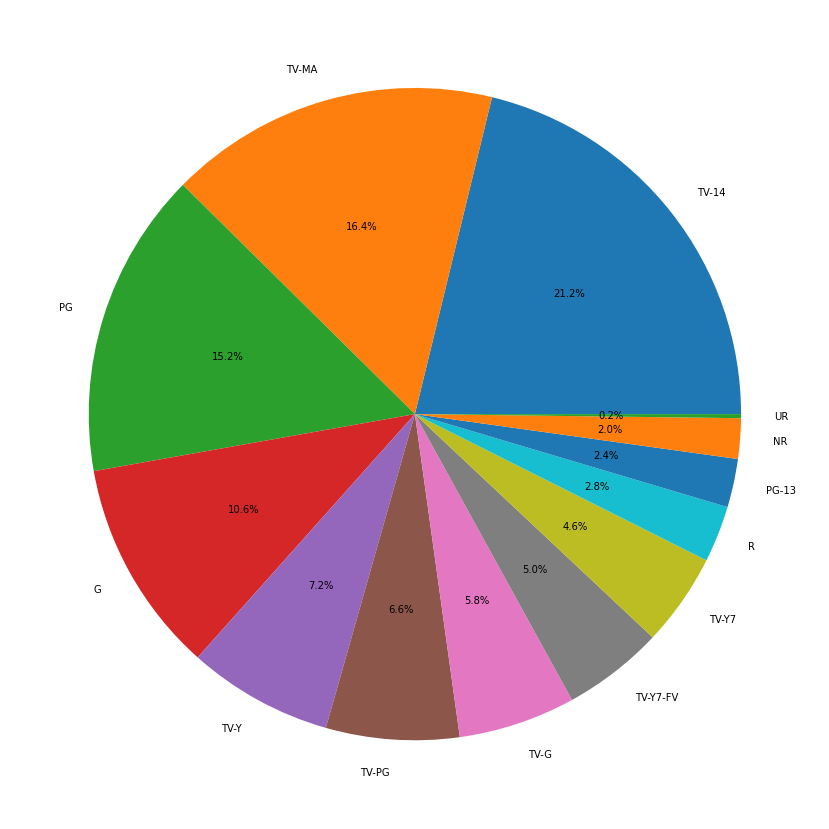

In [ ]:
# подсчет количества значений по столбцу 'rating'
counts = data['rating'].value_counts()

# построение круговой диаграммы
fig, ax = plt.subplots(figsize=(15, 15))
ax.pie(counts, labels=counts.index, autopct='%1.1f%%')
#ax.set_title('Распределение рейтингов')

plt.show()

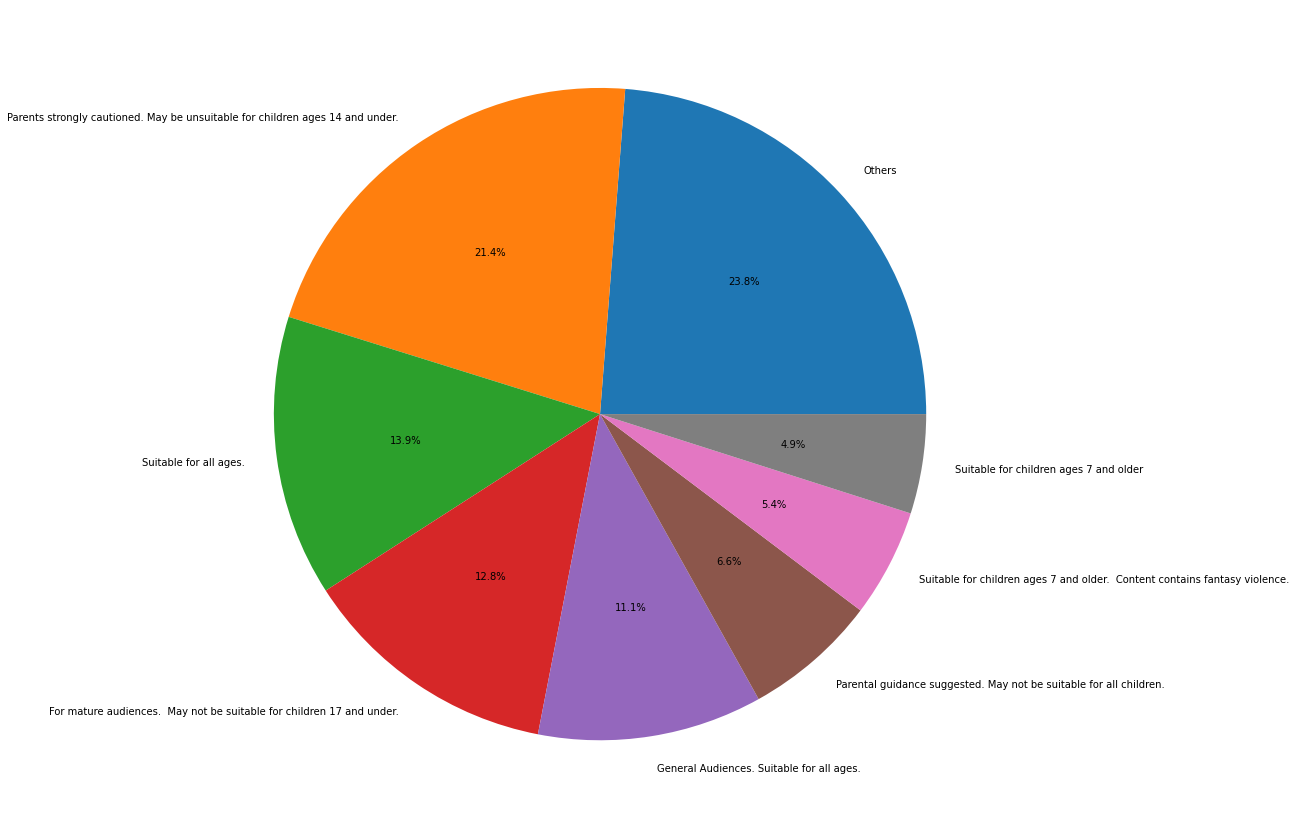

In [ ]:
# подсчет количества значений по столбцу 'rating'
counts = data['ratingLevel'].value_counts()

# построение круговой диаграммы
fig, ax = plt.subplots(figsize=(15, 15))
ax.pie(counts, labels=counts.index, autopct='%1.1f%%')
#ax.set_title('Распределение по рейтинговым группам')

plt.show()

Отформатированная круговая диаграмма

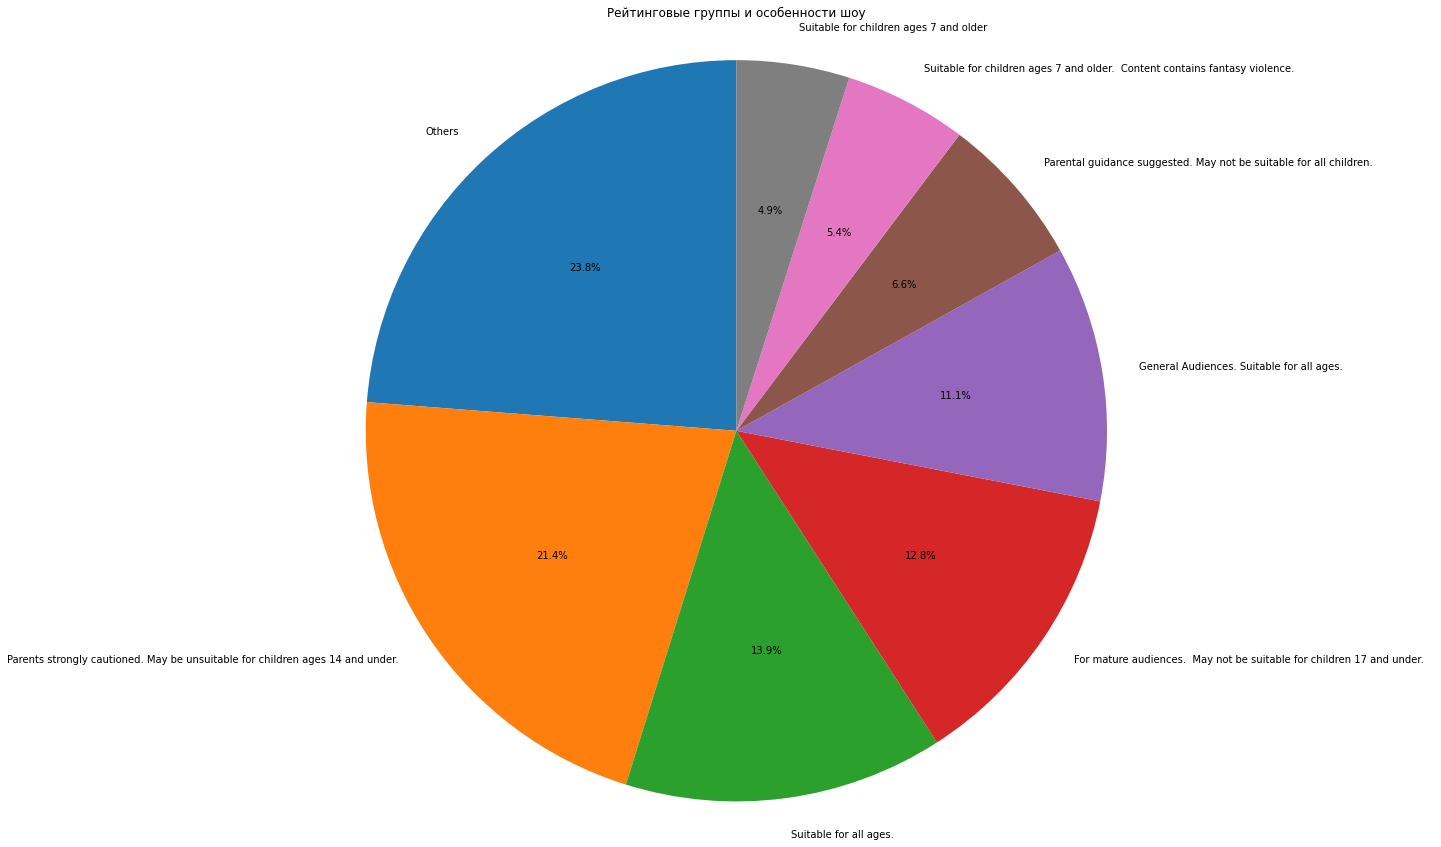

In [ ]:
# находим процент каждого значения в столбце "ratingLevel"
counts = data['ratingLevel'].value_counts(normalize=True)

# создаем список значений, которые составляют менее 3% от общего количества
others = counts[counts < 0.03].index.tolist()

# заменяем значения, которые входят в список "others", на значение "Others"
data.loc[data['ratingLevel'].isin(others), 'ratingLevel'] = 'Others'

# задаем размер круговой диаграммы
fig, ax = plt.subplots(figsize=(25, 15))

# пересчитываем процент для каждого значения после замены
counts = data['ratingLevel'].value_counts(normalize=True)

# строим круговую диаграмму на основе процента каждого значения
plt.pie(counts.values, labels=counts.index, autopct='%1.1f%%', startangle=90)

plt.title('Рейтинговые группы и особенности шоу')
plt.axis('equal')
plt.show()

### Теперь вам нужно выбрать любое из представленных шоу и при помощи изученных инструментов составить описательный портрет этого шоу :) 
Аналитики и Data Scientist-ы очень любят все сравнивать, поэтому при составлении описательного портрета рекомендуем вам сравнить выбранное шоу с другими по каким-либо характеристикам. Результаты не забудьте внести в презентацию. При возникновении трудностей обязательно пишите в чат, преподавателю или ассистентам.

#### Описательный портрет шоу "Black Mirror"

Отобразим данные о выбранном шоу, представленные в файле NetflixShows.csv

In [ ]:
black_mirror = data[data['title'] == 'Black Mirror']
black_mirror

title rating                                        ratingLevel  \
17  Black Mirror  TV-MA  For mature audiences.  May not be suitable for...   

    release year  user rating score  
17          2016               80.0

#### Вопросы и ответы относительно шоу "Black Mirror":
*   Какой рейтинг у шоу "Black Mirror"?

Рейтинг шоу "Black Mirror" - TV-MA, что означает, что данное шоу для взрослой аудитории. Может не подходить для детей до 17 лет.

*   Какая рейтинговая группа у шоу "Black Mirror"?

Рейтинговая группа шоу "Black Mirror" означает, что данное шоу для взрослой аудитории. Может не подходить для детей до 17 лет.

*   В каком году было выпущено шоу "Black Mirror"?

Шоу "Black Mirror" было выпущено в 2011 году.

*   Какой рейтинг среди у пользователей, посмотревших шоу "Black Mirror"?

Из данных можно узнать, что рейтинг пользователей, посмотревших шоу "Black Mirror" - 80.0.

*   Какое место по данным представленного списка занимает шоу "Black Mirror"?

Шоу "Black Mirror" занимает 18-е место из 500 по рейтингу пользователей.



In [ ]:
num_rows = len(data)

# Сортировка датасета по колонке 'user rating score' в порядке убывания
data_sorted = data.sort_values(by='user rating score', ascending=False)

# Нахождение места шоу по рейтингу
show_title = 'Black Mirror'
show_index = data_sorted[data_sorted['title'] == show_title].index.item()

print(f'Шоу "{show_title}" занимает {show_index+1}-е место из {num_rows} по рейтингу пользователей.')

Шоу "Black Mirror" занимает 18-е место из 500 по рейтингу пользователей.
